# <center>Введение</center>

К обучению без учителя можно отнести:

* **Методы кластеризации**. Они позволяют разделить объекты на группы, внутри которых объекты максимально похожи друг на друга.

* **Методы понижения размерности**. С их помощью можно уменьшить число признаков, которые характеризуют объект. Обычно количество признаков уменьшают до двух-трёх для дальнейшей визуализации данных или использования при обучении моделей.

* **Методы ассоциации**. Они используются для того, чтобы найти правила и законы, по которым существует последовательность действий.

# <center>Базовая кластеризация</center> 

Кластеризация позволяет разбить объекты на группы, которые называются **кластерами**.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера. Для нахождения центроида мы берём все значения по оси *x* и считаем среднее.

## <center>Алгоритм k-means</center>

**Идея алгоритма** состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Математически это выглядит следующим образом: 

$$V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2$$

Мы итерируемся по каждому кластеру и для всех векторов $x$ внутри кластера $S_{i}$ подсчитываем центроиды ($\mu_{i}$). Далее рассчитываем разницу между каждым вектором $x$ кластера $S_{i}$ и центроидом кластера $S_{i}$. Необходимо, чтобы это значение, возведённое в квадрат ($V$), было минимальным для каждого кластера.

Алгоритм *k-means* состоит из девяти шагов:

1) Решаем, на сколько кластеров хотим разделить данные.

2) Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров.

3) Распределим оставшиеся объекты датасета по трём кластерам. (Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.)

4) Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды.

5) После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов. Так как у нас новые кластеры, центроиды могли сильно измениться. Поэтому при подсчёте расстояний ближайшим к объекту может оказаться уже другой центроид. Значит, этот объект будет принадлежать к другому кластеру.

6) Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7.

7) Далее для каждого кластера подсчитаем средний квадрат расстояния от объектов до центров их кластеров. Находим суммарное отклонение.

8) Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2. В шаге 1 мы выбирали первые объекты кластера случайным образом, но так можно выбрать не разные объекты, а те, что находятся рядом. В таком случае кластеризация получится некачественной. Чтобы такого не происходило, мы повторяем весь алгоритм несколько раз, начиная с шага 2. В *sklearn* по умолчанию проводится десять итераций.

9) Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации. Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения, которое рассчитывали на шаге 7.

Очевидно, что если все объекты будут в одном кластере, это будет худший сценарий с максимальным среднеквадратичным отклонением. 

А если каждый объект будет принадлежать собственному кластеру, отклонение будет нулевым, так как один объект будет являться и объектом кластера, и его центром масс, а значит расстояние между объектом кластера и центроидом кластера равно нулю. Такое разбиение будет считаться переобучением, так как мы слишком подстраиваемся под данные.

|Название|Принцип работы|
|--------|--------------|
|K-MEANS|Находит центроиды кластера как среднее значение координат.|
|K-MEANS++|В классическом алгоритме *k-means* центроиды выбираются случайно, но это может приводить к тому, что два объекта, которые находятся близко друг к другу, будут центроидами двух разных кластеров — это будет приводить к долгой работе алгоритма.Алгоритм *k-means++* чуть «хитрее» и выбирает центроиды кластеров не совсем случайно.|
|K-MEDIANS|На этапе поиска центроидов кластера находит не среднее значение координат, а медиану.|
|K-MEDOIDS|Работает так же, как *k-medians*, но медианой кластера будет не какая-то точка в кластере, а объект, который находится ближе всего к этим координатам медианы кластера.|
|FUZZY C-MEANS|Данный алгоритм разрешает нечётко присваивать кластеры. Каждый объект может принадлежать к разным кластерам с разной вероятностью.|

Для того чтобы запустить алгоритм кластеризации *k-means*, нам нужна библиотека `sklearn` и модуль `KMeans`.

**Что необходимо для запуска:**

* Обязательно задать количество кластеров, на которые необходимо разделить данные.

* Данные, т. е. параметры объектов ($x_{i}$), которые мы будем передавать в виде матрицы наблюдений *X*.

```python
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
```

Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из `df2`, то мы просто воспользуемся методом `predict`:

```python
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)
```

Чтобы запустить алгоритм, необходимо задать **параметры кластеризации**:

* `n_clusters` — количество кластеров. По умолчанию — 8.

* `init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.

* `n_init` — количество случайных инициализаций алгоритма `k-means`. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия `k-means`. По умолчанию `n_init = 10`.

* `max_iter` — максимальное количество итераций алгоритма `k-means` при одном запуске. По умолчанию — 300.

* `random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

> *P.S. смотри блоктон "extra_1", часть 1*

## <center>Недостатки алгоритма k-means</center>

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм *k-means* будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

## <center>Определение оптимального k для алгоритма k-means</center>

Для этого можно использовать несколько способов: **метод локтя (elbow plot)**, **статистику разрыва (Gap Statistic Method)**, **коэффициент силуэта (Average Silhouette Method)**.

Начнём с **метода локтя**.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**.

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси *x* будет отложено количество кластеров, а по оси *y* — инерция.

**Инерция** — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера. Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_19.png)

Теперь реализуем это в виде кода. Нам нужно посчитать значение инерции для кластеризаций с разным количеством кластеров. Для этого напишем функцию `get_inertia`, которая будет принимать данные и количество кластеров и возвращать значение инерции:

```python
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
```

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_20.png)

Таким образом, метод локтя — это довольно простой метод, основанный на учёте евклидова расстояния между объектами кластера и центроидами.

Однако изгиб на графике также может быть представлен нечётко. Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_34.png)

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на группы.

На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

Посчитаем силуэт, используя *sklearn*:

```python
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
```

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-2_24.png)

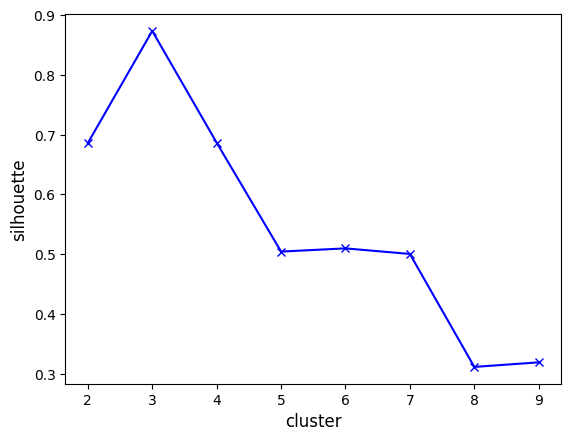

In [1]:
# Задание 2.7

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

instr_df = pd.read_csv("data/values_from_the_instrument.csv")

def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,instr_df))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

## <center>Метрики</center>

Кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. Существует ряд метрик, которые можно подсчитать, **если данные размечены**.

**1) Однородность кластеров (homogeneity score)**

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру. Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.

В первом случае ответы модели будут полностью совпадать с истинными ответами, а во втором будут полностью противоположны им:

In [2]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


Во втором случае мы получаем метрику, равную 1, хотя предсказывали совершенно противоположный результат. Почему так получилось?

Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.

**2) Полнота кластера (completeness score)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше.

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [3]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

**3) V-мера (V-Measure)**

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

V-мера рассчитывается по формуле:

$$v = \frac{(1 + \beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)}$$

По умолчанию $\beta=1$, но это значение можно варьировать, если хочется дать разный вес разным свойствам.

* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta < 1$. Тогда значение $\beta \times homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \times homogeneity$, тем выше $v$.

* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение $\beta$ так, чтобы $\beta > 1$.

> Данную метрику можно сравнить с метрикой *F-меры*. Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

> Метрику однородности кластера при кластеризации можно сравнить с метрикой *precision* из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика *recall* из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

```python
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
>1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
>0.9070246789753754
```

**4) Индекс Рэнда**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (*number of agreeing pairs*), среди предсказанных и размеченных данных.

$$Rand \ Index = \frac{number \ of \ agreeing \ pairs}{number \ of \ pairs}$$

* $number \ of \ pairs$ - общее количество пар,

* $number \ of \ agreeing \ pairs$ - количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [4]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [5]:
# Задание 3.3

from sklearn.metrics.cluster import homogeneity_score
round(homogeneity_score(labels_true =[1,2,2,1,0], labels_pred=[1,0,2,1,2]), 2)

0.74

# <center>Иерархическая кластеризация</center>

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма. Её можно сравнить с древом языков мира, на котором языки объединяются в различные семьи, укрупняясь и образуя всё более обширные языковые ветви.

**Дендрограмма**  — это древовидная диаграмма, которая содержит $n$ уровней. Каждый уровень — это шаг укрупнения кластеров.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_2.png)

Чем больше схожесть между двумя объектами на дендрограмме, тем ниже высота внутренней ветки, которая идёт из объекта или кластера.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_3.png)

На дендрограмме выше Сельма и Пэтти Бувье, сёстры Мардж Симпсон, похожи друг на друга, поэтому высота соединяющей их внутренней ветки маленькая, а сама Мардж не похожа на своих сестёр, поэтому высота внутренней ветки гораздо больше.

Если ещё раз посмотреть на график с дендрограммой ирисов, можно сказать, что при кластеризации мы можем пойти снизу вверх (от листьев к корню) или сверху вниз (от корня к листьям). И действительно — при иерархической кластеризации выделяют два подхода: **агломеративный** и **дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

**1) Дивизионный (дивизивный) метод (divisive)**

Кластеры создаются при делении крупных кластеров:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_7.png)

**2) Агломеративный метод (agglomerative)**

Новые кластеры создаются в ходе объединения более мелких кластеров:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_6.png)

Для того чтобы построить дендрограмму, нужна **матрица сходства**, построенная на основе расстояний между кластерами.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_8.png)

**$K$** — это мера сходства между двумя кластерами. По диагонали в матрице записаны единицы, так как объекты максимально похожи на самих себя.

Чтобы рассчитать данную матрицу, нужно знать расстояния между двумя кластерами. Существуют разные подходы его вычисления, и выбранный подход влияет на результат кластеризации.

**<u>Методы определения расстояния между кластерами:</u>**

**1) Метод одиночной связи (single linkage)**

Поиск минимального расстояния между объектами из разных кластеров.

**2) Метод полной связи (complete (maximum) linkage)**

Поиск максимального расстояния между объектами из разных кластеров.

**3) Метод средней связи (pair group method using arithmetic mean)**

Расстояние между двумя кластерами считается как среднее от расстояния между двумя элементами этих кластеров.

**4) Центроидный метод (centroid)**

Расстояния между кластерами рассчитываются как расстояния между центроидами этих кластеров.

**5) Метод Уорда (Ward's linkage, Minimal Increase of Sum-of-Squares (MISSQ))**

Расстояние рассчитывается как сумма квадратов разностей между точками кластеров. По сути, это подход, в котором мы минимизируем дисперсию в кластере, и в этом смысле он аналогичен методу *k-средних*, но реализуется с помощью иерархического подхода. Используется в *sklearn* по умолчанию.

*Метод одиночной связи* но очень плохо справляется с вытянутыми и перекрывающимися данными. 

Использование *методов средней связи и полной связи* приносит хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

**<u>Задачи где используется иерархическая кластеризация:</u>**

* Для построения филогенетического дерева.

* Для анализа текстов.

Базовые параметры, которые необходимо передать в `AgglomerativeClustering`:

* `n_clusters` — количество кластеров; по умолчанию — 2.

* `linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

```python
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_
```

# <center>EM-алгоритмы кластеризации</center>

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров *EM (Expectation-maximization)-алгоритма* — это *k-means-кластеризация*.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере *k-means*, то:

1) на шаге **E** мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;

2) на шаге **M** мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов, алгоритм *k-means* не справляется с кластеризацией (см. ниже). В качестве альтернативы можно взять ещё один из алгоритмов *EM-кластеризации* — **модель гауссовой смеси (Gaussian Mixture Model, GMM)**, в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_17.png)

1) На шаге **E** данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру,
2) На шаге **M** будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

## <center>Задачи где используется EM-кластеризация</center>

1) *GMM*-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

2) Используя *GMM*, можно анализировать временные ряды цен в периоды действия акций.

3) *GMM* можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

![inage.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_20.png)

## <center>Запуск EM-кластеризации</center>

In [7]:
# загрузим данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

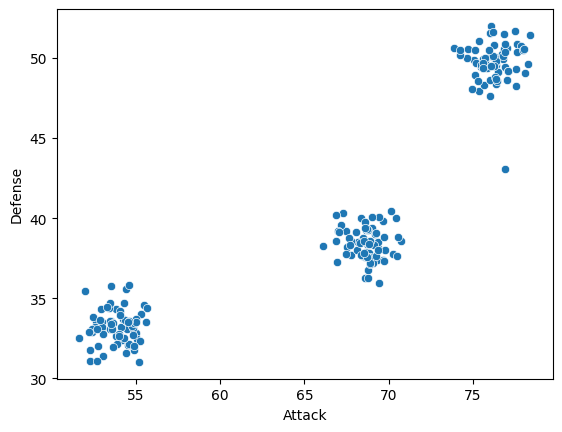

In [8]:
# импортируем библиотеки 
import numpy as np
from sklearn.mixture import GaussianMixture
import seaborn as sns

# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

In [9]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

# подробнее в блокноте "extra_1", часть 2

Основные параметры, которые необходимо задать для запуска алгоритма `GaussianMixture`:

* `n_components` — количество кластеров.

* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

**<u>Преимущества:</u>**

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. *K-Means* является частным случаем *GMM*.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_23.png)

* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от *k-means*, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

**<u>Недостатки:</u>**

* Нужно задавать количество кластеров.

* Чувствителен к тому, с какой точки начинается алгоритм.

* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

<Axes: xlabel='year', ylabel='price'>

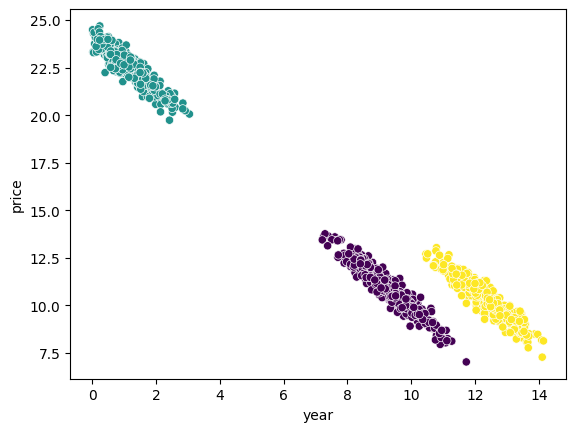

In [18]:
# Задание 5.4

import pandas as pd
from sklearn.mixture import GaussianMixture

df = pd.read_csv('data/housing.csv')

gaussian_clustering = GaussianMixture(n_components=3)
# обучаем модель кластеризации и делаем предсказание для наших данных
predictions = gaussian_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем 
sns.scatterplot(x=df.year, y=df.price, c=predictions)

<Axes: xlabel='year', ylabel='price'>

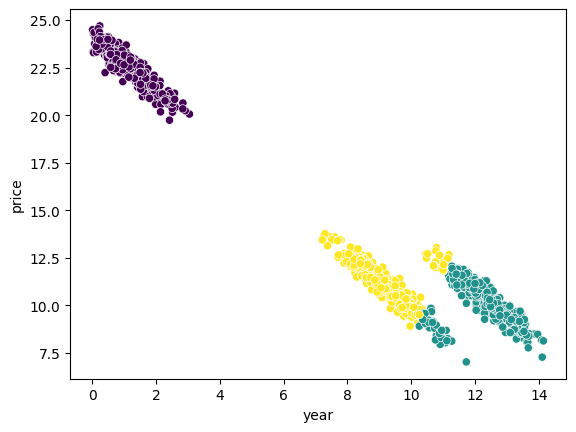

In [19]:
# Задание 5.5

from sklearn.cluster import KMeans

kmeans_clustering = KMeans(n_clusters=3)
# обучим модель кластеризации и предскажем кластеры для наших данных
predictions_kmeans = kmeans_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_kmeans)

# <center>Спектральная кластеризация</center>

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1) На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете. Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине. Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_25.png)

2) После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_26.png)

3) Далее уменьшаем размерность данных. До понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_27.png)

4) Далее проводим кластеризацию матрицы с уменьшенной размерностью. Основываясь на значениях признаков *v2*, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_28.png)

> Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

## <center>Задачи где используется спектральная кластеризация</center>

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_29.png)

## <center>Запуск спектральной кластеризации</center>

In [20]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering

# загрузим данные
df = pd.read_csv('data/pokemon.csv')

# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры `SpectralClustering`:

* `n_clusters` — количество кластеров; по умолчанию — 8.
* `random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

<Axes: xlabel='Attack', ylabel='Defense'>

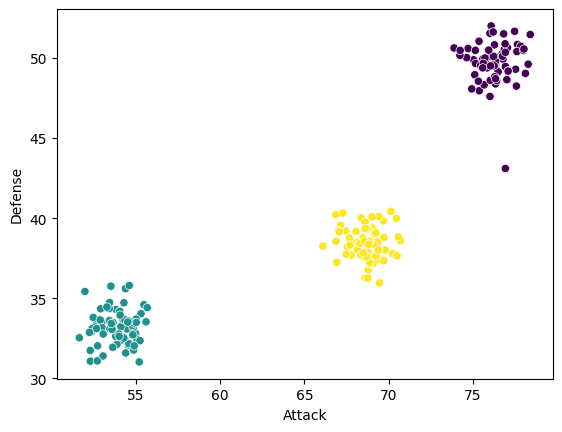

In [21]:
# визулизация
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

**<u>Преимущества:</u>**

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.

* Эффективна для кластеризации разрежённых данных.

* Хорошо работает на практически любых распределениях данных.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_32.png)

> Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

**<u>Недостатки:</u>**

* Нужно заранее задавать количество кластеров.

* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

# <center>Кластеризация на основе плотности</center>

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

Наиболее популярный алгоритм кластеризации на основе плотности — **DBSCAN**.

## <center>DBSCAN (Density-based spatial clustering of applications with noise)</center>

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте.

* в данных большое количество выбросов, например данные медицинских анализов пациентов.

**<u>Преимущества</u>**

* В отличие от *k-means*, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.

* Алгоритм хорошо работает с данными произвольной формы.

* *DBSCAN* отлично справляется с выбросами в датасетах.

![image.pnr](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_34.png)

1) В четвёртом случае, оба алгоритма (*k-means и DBSCAN*) справляются хорошо.

2) Алгоритм *DBSCAN* отлично справился с кластеризацией данных под номерами 1 и 2.

3) Для случая под номером 3 результаты обоих алгоритмов кластеризации являются спорными. Более интуитивной кажется следующая интерпретация данных: нижнее скопление — первый кластер, среднее — второй, правое верхнее — третий. Наиболее разреженные и отдаленные точки, не попадающие ни в один кластер, можно отнести либо к ближайшему кластеру, либо к выбросам.

4) в последнем, пятом случае:
    * *DBSCAN* определил, что плотность точек примерно равномерна на всей площади распределения и отнес все точки к единому кластеру. Это связано с тем, что приведённые данные образуют один участок с одинаковой плотностью, из-за чего DBSCAN не может разделить такие данные на кластеры;
    * Алгоритм *k-means* разделил данные на заранее заданные три кластера, что является иллюстрацией недостатка методов, где пользователь самостоятельно задаёт количество кластеров.

**<u>Алгоритм кластеризации *DBSCAN*:</u>**

1) Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе $r$ от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_37.png)

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_38.png)

2) Выделим центральные точки (*core points*).

**Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

Находим центральные точки во всём датасете. Это будет выглядеть так:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_39.png)

3) Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_40.png)

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_41.png)

4) После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе $r$ от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_42.png)

5) Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-3_43.png)

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

## <center>Где используется DBSCAN</center>

* Можно использовать *DBSCAN* для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести *DBSCAN*-кластеризацию.

* Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от *DBSCAN*, не выделяют выбросы в отдельные объекты.

* Часто *DBSCAN* применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

## <center>Запуск DBSCAN</center>

<Axes: xlabel='Attack', ylabel='Defense'>

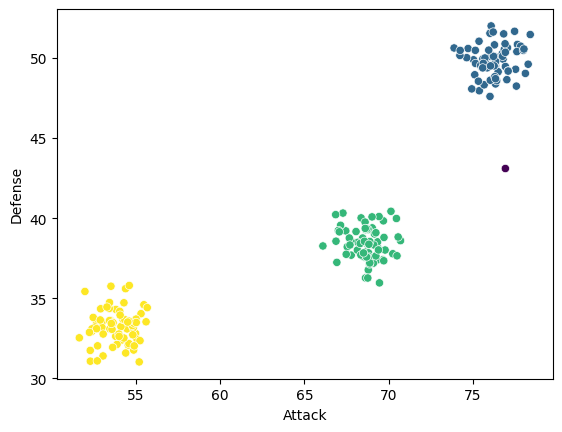

In [22]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска `DBSCAN`:

* `eps` — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме *DBSCAN*. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.

* `min_samples` — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

**<u>Преимущества:</u>**

* Не нужно задавать количество кластеров.

* Устойчив к шуму и выбросам, может находить выбросы в данных.

* Способен найти кластеры любой геометрической формы.

**<u>Недостатки:</u>**

* Не может качественно кластеризовать наборы данных с большой разницей в плотности.

* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.

* Бывает сложно подобрать `eps`.

|Алгоритм|Принцип работы|Преимущества|Недостатки|
|--------|--------------|------------|----------|
|Иерархическая кластеризация|Строит дерево (иерархию) вложенных кластеров.|1) позволяет построить дендрограмму кластеризации и тем самым лучше проанализировать данные; 2) позволяет найти иерархию в данных.|1) необходимо выбирать оптимальное количество кластеров; 2) неравномерное распределение кластеров; 3) работает на небольшом датасете.|
|EM-кластеризация (модель гауссовой смеси)|Предполагает, что любое наблюдение принадлежит ко всем кластерам, но с разной вероятностью.|1) хорошо работает на данных в форме эллипса, окружности, на перекрывающихся данных; 2)устойчив к шуму в данных; 3) работает быстро при удачном выборе начальных кластеров.|1) необходимо выбирать оптимальное количество кластеров; 2) работает долго при неудачном выборе кластеров.|
|Спектральная кластеризация|Снижает размерность данных, а затем применяет более простые алгоритмы кластеризации, например *k-means*).|1) подходит для кластеризации данных с большим количеством признаков; 2) эффективен для кластеризации разрежённых данных; 3) хорошо работает на практически любых распределениях данных.|1) необходимо выбирать оптимальное количество кластеров; 2) подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.|
|Кластеризация на основе плотности|Находит в датасете области с высокой плотностью и, основываясь на этом, образует кластеры.|1) нет необходимости выбирать оптимальное количество кластеров; 2) устойчив к шуму и выбросам.|1) не способен качественно кластеризовать наборы данных с большой разницей в плотности; 2) иногда бывает сложно подобрать параметры для моделирования.|

<Axes: xlabel='year', ylabel='price'>

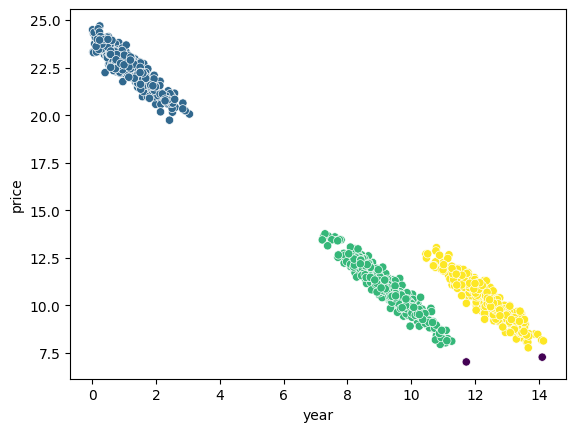

In [23]:
# Задание 7.5

from sklearn.cluster import DBSCAN

df = pd.read_csv('data/housing.csv')

dbscan_clustering = DBSCAN()
# обучаем модель DBSCAN и делаем предсказания
predictions_dbscan = dbscan_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_dbscan)

<Axes: xlabel='year', ylabel='price'>

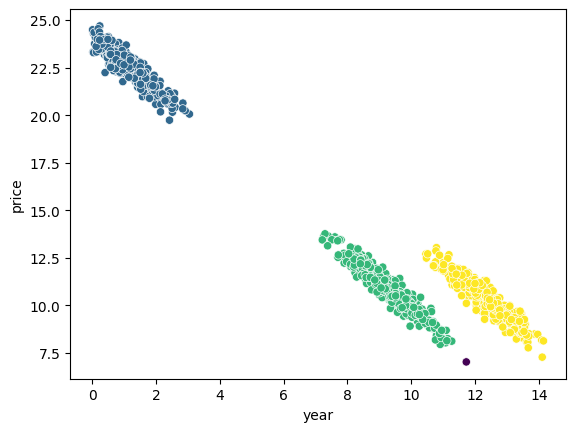

In [24]:
# Задание 7.6

dbscan_clustering = DBSCAN(eps=0.7, min_samples=6)
predictions_dbscan = dbscan_clustering.fit_predict(X=df[['year', 'price']])
sns.scatterplot(x=df.year, y=df.price, c=predictions_dbscan)

# <center>Визуализация результатов кластеризации</center>

![image.png](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@dst3-ml4-4_1.png)

*P.S. Смотри блокнот "extra_2"*